## Importing

In [16]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import salishsea_tools.viz_tools as sa_vi
from sklearn import preprocessing


## SOM

In [17]:
def som (depth, ds, ds_bio, row, col):

    # Variable selection
    temp = ds.votemper
    saline = ds.vosaline

    # Biological variables
    sil = ds_bio.silicon
    nitr = ds_bio.nitrate
    ammo = ds_bio.ammonium

    # Open the mesh mask
    mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
    mask = mesh.tmask.to_numpy()

    temp = temp.where(mask[0,depth]==1)
    saline = saline.where(mask[0,depth]==1)

    sil = sil.where(mask[0,depth]==1)
    nitr= nitr.where(mask[0,depth]==1)
    ammo = ammo.where(mask[0,depth]==1)

    # Post processing 
    inputs = np.stack((temp[0,depth].values.flatten(), saline[0,depth].values.flatten()))
    indx = np.argwhere(~np.isnan(inputs[0]) & ~np.isnan(inputs[1])) 
    inputs2 = inputs[:,indx[:,0]]
    inputs3 = preprocessing.normalize(inputs2, norm= 'max')
    inputs3 = inputs3.transpose()

    # SOM
    temp_som = SOM(m=col, n=row, dim= inputs3[0,:].size, lr = 0.1)
    temp_som.fit(inputs3, epochs = 5)
    predictions = temp_som.predict(inputs3)

    # Post processing
    unique, counts = np.unique(predictions, return_counts=True)
    indx2 = np.full(inputs[0,:].size,np.nan)
    indx2[indx[:,0]] = predictions
    clusters = np.reshape(indx2,(898,398)) 

    return (unique, temp, inputs2, predictions, clusters)

## Plotting

In [18]:
def plotting (depth, inputs2, unique, predictions, temp, clusters):

    if date[0].month < 10:
        month = '0' + str(date[0].month)
    else:
        month = str(date[0].month)

    if date[0].day < 10:
        day = '0' + str(date[0].day)  
    else:
        day = str(date[0].day) 

    # Preparation of the dataarray 
    map = xr.DataArray(clusters,
                    coords = {'y': temp[0,depth].y, 'x': temp[0,depth].x},
                    dims = ['y','x'],
                    attrs=dict(description="Clusters of the performed self organizing map algorithm",
                                long_name ="Cluster",
                                units="count"),
                    ) 

    fig, axs = plt.subplots(ncols=2, figsize = (10,8))

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    cmap = plt.get_cmap('tab20', unique.max()+1)
    scatter = axs[0].scatter(inputs2[1],inputs2[0], cmap=cmap, c= predictions, vmin = unique.min(), vmax = unique.max()+1, alpha = 0.2, s = 10)

    cbar = fig.colorbar(scatter, ticks= unique+0.5) 
    cbar.set_ticklabels(unique)
    cbar.set_label('Cluster [count]')
    axs[0].set_xlabel('Salinity [g/kg]')
    axs[0].set_ylabel('Temperature [degrees Celsius]')


    cmap = plt.get_cmap('tab20', unique.max()+1)
    clus = map.plot.pcolormesh(ax=axs[1],cmap=cmap, vmin = unique.min(), vmax = unique.max()+1, add_colorbar=False)

    cbar = fig.colorbar(clus, ticks = unique+0.5) 
    cbar.set_ticklabels(unique)
    cbar.set_label('Cluster [count]')

    fig.suptitle('Depth: ' + str(np.round(ds['deptht'][depth].values,2)) + ' meters, ' + str(date[0].year) + '/' + month + '/' + day)
    

## Main Body

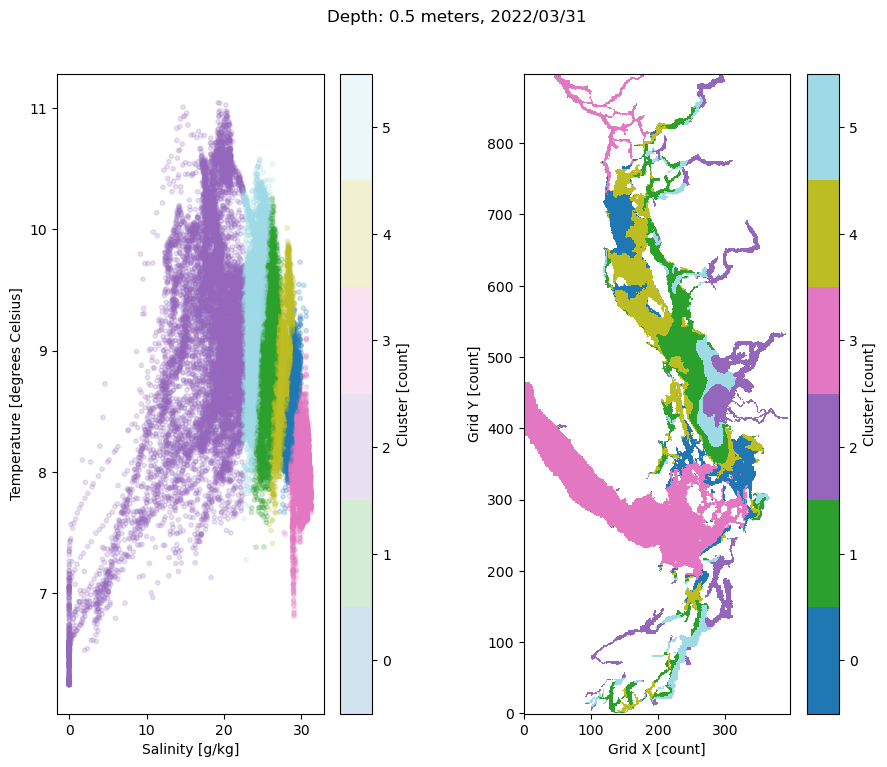

In [19]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 0

row = 3
col = 2

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)

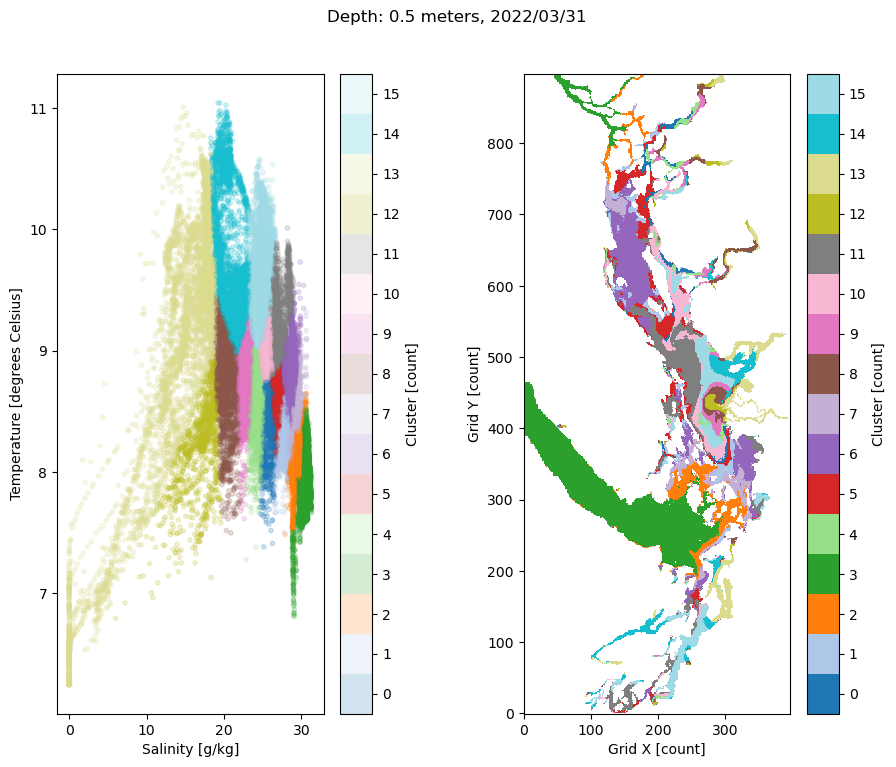

In [20]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 0

row = 4
col = 4

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)

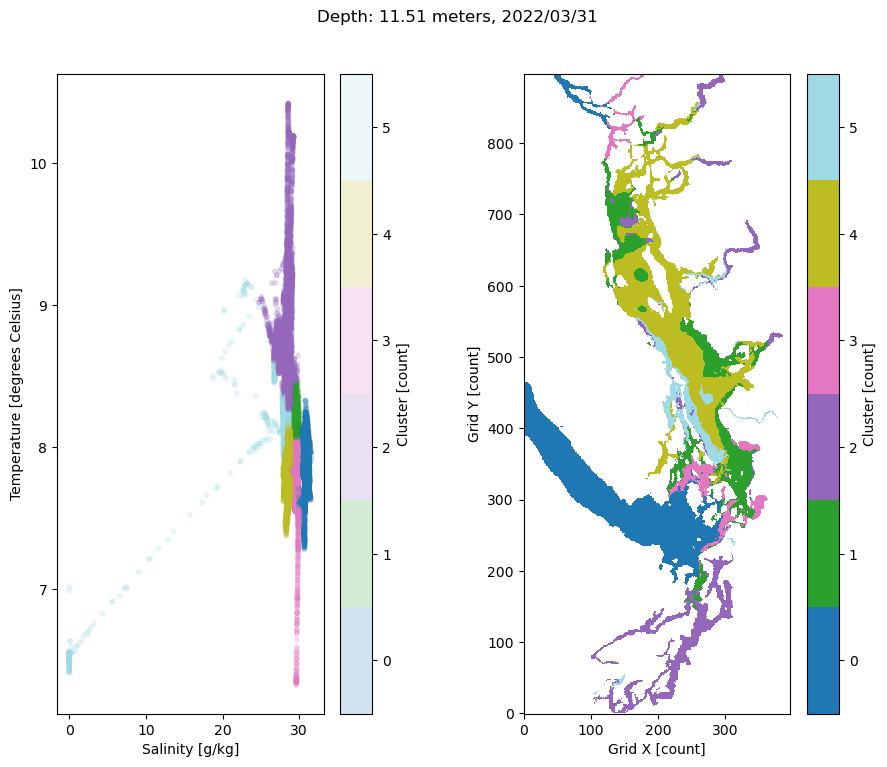

In [21]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 11

row = 3
col = 2

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)

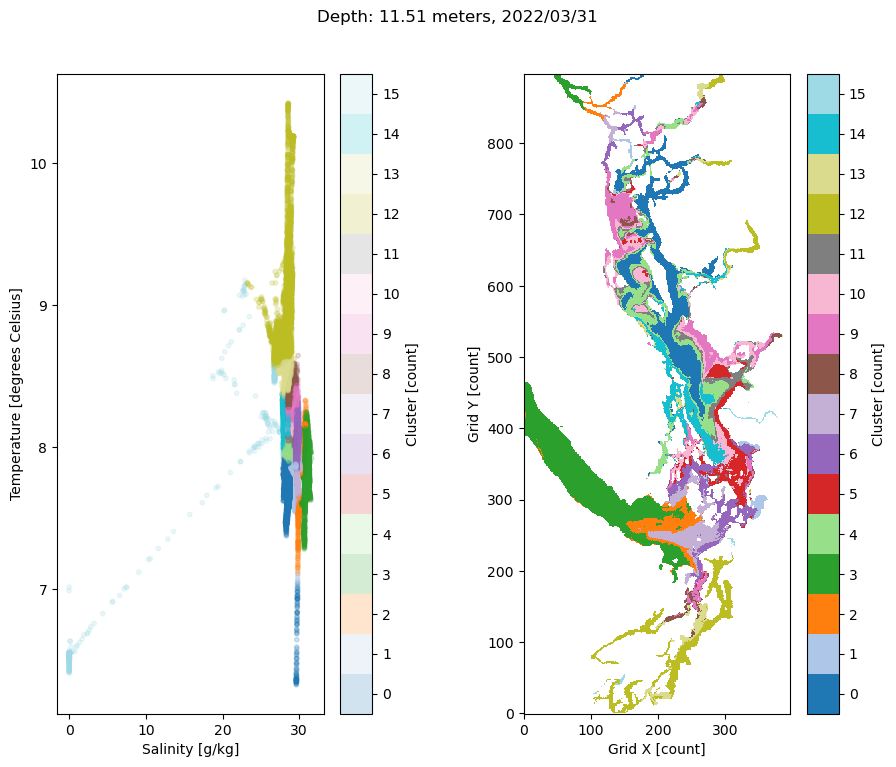

In [22]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 11

row = 4
col = 4

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)

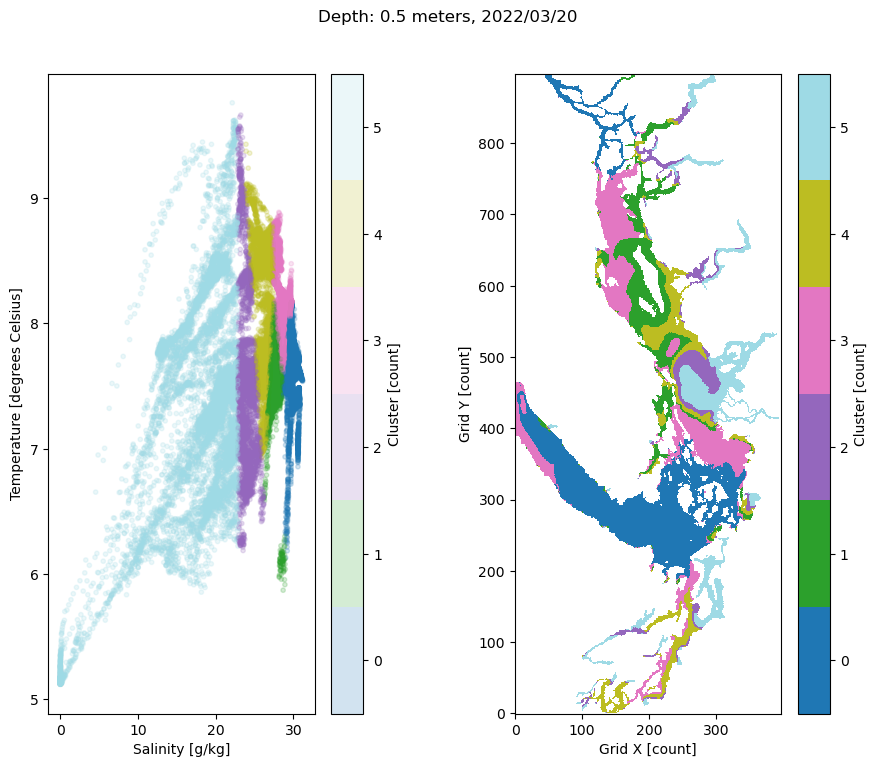

In [23]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 0

row = 3
col = 2

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)

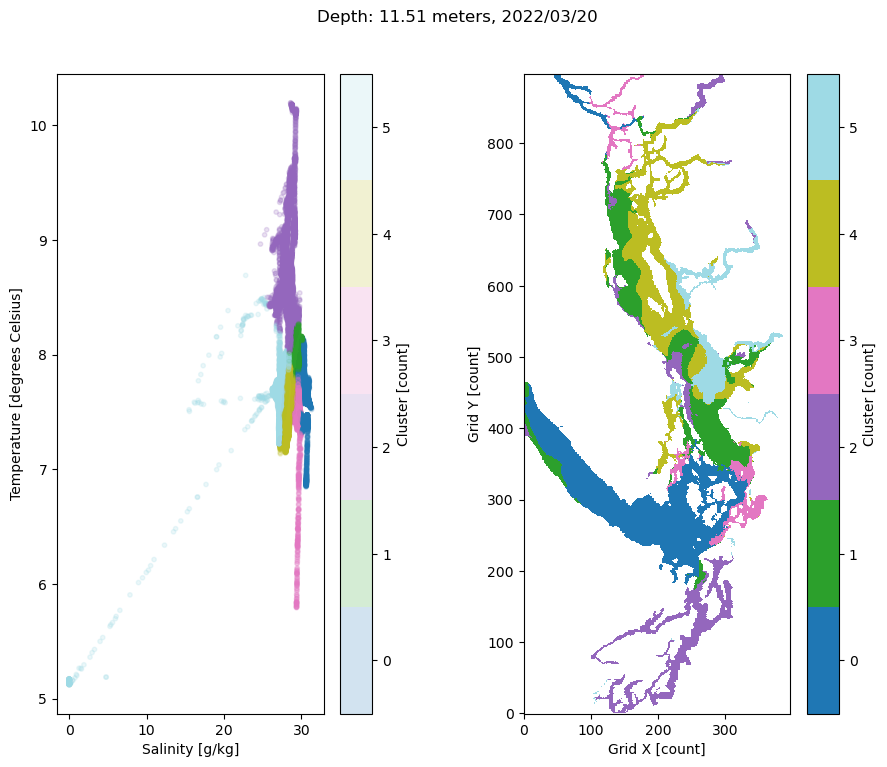

In [24]:
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

depth = 11

row = 3
col = 2

unique, temp, inputs, predictions, clusters = som(depth, ds, ds_bio,row,col)
plotting (depth, inputs, unique, predictions, temp, clusters)